
# License Application Status Prediction

## Business Problem

1. **Objective**
   - To assess if a customer's license should be issued(AAI), renewed(REV) or cancelled(AAC) depending on various parameters
   - Learn from various features of applications rejected or given in the past to come up with a decision


2. **Machine Learning Problem**
   - Develop a machine learning model to learn relation of the target variable with the set of features available from the training data


3. **Technology**
   - Python, h2O, Scikit-learn, tensorflow, keras, Pandas, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t better accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time in assessing a customer's license application

### Import Libraries

In [1]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_351"; Java(TM) SE Runtime Environment (build 1.8.0_351-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.351-b10, mixed mode)
  Starting server from /Users/jacob/miniforge3/envs/mlenv/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/tmp5dgd2ktu
  JVM stdout: /var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/tmp5dgd2ktu/h2o_jacob_started_from_python.out
  JVM stderr: /var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/tmp5dgd2ktu/h2o_jacob_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_jacob_zipxym
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.095 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Load in Data

In [4]:
df = pd.read_csv("Data/License_Data.csv.xls")
df.head()

/var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/ipykernel_77474/3556164403.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/License_Data.csv.xls")


,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,LICENSE_NUMBER,APPLICATION_TYPE,APPLICATION_CREATED_DATE,APPLICATION_REQUIREMENTS_COMPLETE,PAYMENT_DATE,CONDITIONAL_APPROVAL,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


### EDA

In [5]:
# Check df shape
df.shape

(85895, 32)

In [6]:
# Check the value count of our target variable
df.LICENSE_STATUS.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE_STATUS, dtype: int64

In [7]:
# Limit the License Status to the 3 most common categrories
df = df[df.LICENSE_STATUS.isin(['AAI', 'AAC', 'REV'])]

In [8]:
# Check nulls
df.isnull().sum()

ID                                       0
LICENSE_ID                               0
ACCOUNT_NUMBER                           0
SITE_NUMBER                              0
LEGAL_NAME                               0
DOING_BUSINESS_AS_NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP_CODE                                31
WARD                                 49699
PRECINCT                             56699
WARD_PRECINCT                        49698
POLICE_DISTRICT                      54010
LICENSE_CODE                             0
LICENSE_DESCRIPTION                      0
LICENSE_NUMBER                           1
APPLICATION_TYPE                         0
APPLICATION_CREATED_DATE             64657
APPLICATION_REQUIREMENTS_COMPLETE      214
PAYMENT_DATE                          1287
CONDITIONAL_APPROVAL                     0
LICENSE_TERM_START_DATE                228
LICENSE_TER

In [9]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85890 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85890 non-null  object 
 1   LICENSE_ID                         85890 non-null  int64  
 2   ACCOUNT_NUMBER                     85890 non-null  int64  
 3   SITE_NUMBER                        85890 non-null  int64  
 4   LEGAL_NAME                         85890 non-null  object 
 5   DOING_BUSINESS_AS_NAME             85889 non-null  object 
 6   ADDRESS                            85890 non-null  object 
 7   CITY                               85890 non-null  object 
 8   STATE                              85890 non-null  object 
 9   ZIP_CODE                           85859 non-null  object 
 10  WARD                               36191 non-null  float64
 11  PRECINCT                           29191 non-null  flo

In [10]:
df.nunique()

ID                                   85890
LICENSE_ID                           85890
ACCOUNT_NUMBER                       38895
SITE_NUMBER                            177
LEGAL_NAME                           38742
DOING_BUSINESS_AS_NAME               41684
ADDRESS                              42143
CITY                                  1223
STATE                                   54
ZIP_CODE                              2456
WARD                                    50
PRECINCT                                76
WARD_PRECINCT                         2383
POLICE_DISTRICT                         28
LICENSE_CODE                           106
LICENSE_DESCRIPTION                    106
LICENSE_NUMBER                       49764
APPLICATION_TYPE                         5
APPLICATION_CREATED_DATE              2899
APPLICATION_REQUIREMENTS_COMPLETE     3078
PAYMENT_DATE                          4356
CONDITIONAL_APPROVAL                     2
LICENSE_TERM_START_DATE               2825
LICENSE_TER

<AxesSubplot: xlabel='LICENSE_STATUS', ylabel='count'>

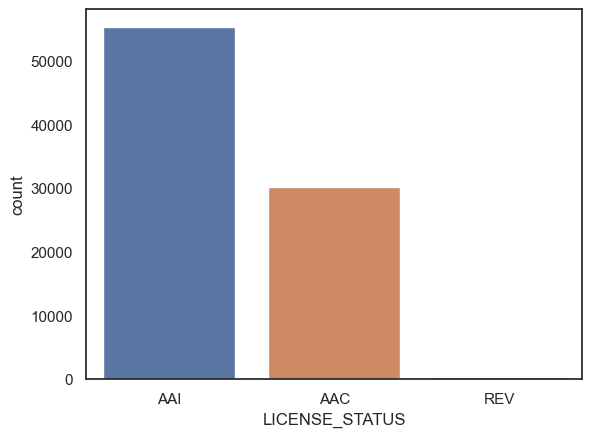

In [47]:
# Plot the counts of License Status
sns.set_theme(style="darkgrid")
sns.countplot(x = df.LICENSE_STATUS)

### Data Cleaning

In [12]:
df['LEGAL_BUSINESS_NAME_MATCH'] = df.apply(lambda x: 1 if str(x['LEGAL_NAME'].upper()) in str(x['DOING_BUSINESS_AS_NAME']).upper()
                                        or str(x['DOING_BUSINESS_AS_NAME']).upper() in str(x['LEGAL_NAME']).upper() else 0,
                                        axis=1)

In [13]:
df.LICENSE_DESCRIPTION.value_counts()

Limited Business License                                        50077
Home Repair                                                     10632
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2320
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Motor Vehicle Repair : Engine Only (Class II)                     931
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Manufacturing Establ

In [14]:
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [15]:
df.LICENSE_DESCRIPTION.nunique()

92

In [16]:
df['LEGAL_NAME'] = df['LEGAL_NAME'].str.replace('.', '', regex=False)
df['DOING_BUSINESS_AS_NAME'] = df['DOING_BUSINESS_AS_NAME'].str.replace('.', '', regex=False)

df['BUSINESS_TYPE'] = 'PVT'

df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('INC'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('INCORPORATED'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('INC'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('INCORPORATED'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LLC'), 'LLC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('LLC'), 'LLC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('CO'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('CORP'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('CORPORATION'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('CO'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('CORP'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('CORPORATION'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LTD'), 'LTD', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LIMITED'), 'LTD', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('LTD'), 'LTD', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('LIMITED'), 'LTD', df['BUSINESS_TYPE'])

In [17]:
df.BUSINESS_TYPE.value_counts()

CORP    27763
PVT     27020
INC     24443
LLC      5048
LTD      1616
Name: BUSINESS_TYPE, dtype: int64

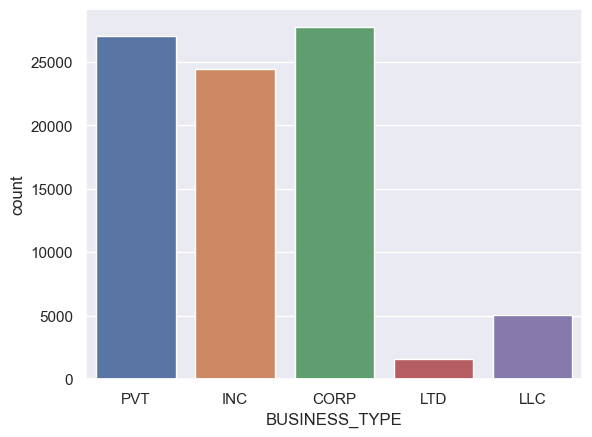

In [18]:
sns.countplot(x=df.BUSINESS_TYPE)
plt.show()

In [19]:
df.ZIP_CODE.value_counts()

60804      1142
60647.0     925
60618       889
60639       878
60007       789
           ... 
90605         1
57108         1
52358         1
16801         1
61115.0       1
Name: ZIP_CODE, Length: 2456, dtype: int64

In [20]:
df['ZIP_CODE'].fillna(-1, inplace=True)
df['ZIP_CODE_MISSING'] = df.apply(lambda x: 1 if x['ZIP_CODE'] == -1 else 0, axis=1)

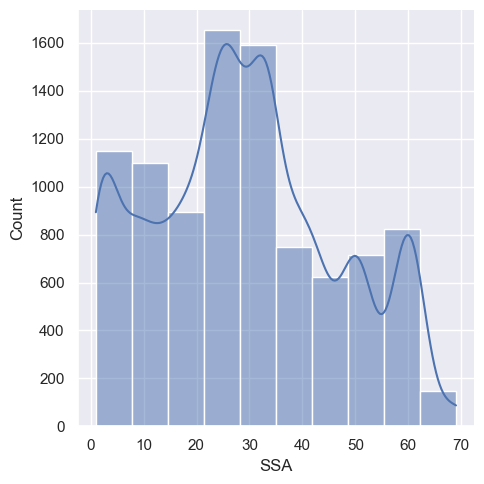

In [21]:
sns.displot(data=df, x="SSA", bins=10, kde=True)

In [22]:
df['SSA'].fillna(-1, inplace=True)

In [23]:
df['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(-1, inplace=True)
df['APPLICATION_REQUIREMENTS_COMPLETE'] = df.apply(lambda x: 0 if x['APPLICATION_REQUIREMENTS_COMPLETE'] == -1 
                                                     else 1, axis=1)

### Train Test Split

In [24]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
# Instantiate and train h2o Model
h2o_rf = H2ORandomForestEstimator(ntrees=100, seed=52, max_depth=10)
h2o_rf.train(x=['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 
                'ZIP_CODE_MISSING', 'SSA', 'APPLICATION_REQUIREMENTS_COMPLETE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE'], 
            y='LICENSE_STATUS', training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1668915043705_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                300                         1.25023e+06            2            10           9.94          1             458           264.24

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.15923540899152214
RMSE: 0.399043116707358
LogLoss: 0.49458822271221925
Mean Per-Class Error: 0.5093042463735342
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
AAC    AAI    REV    Error      Rate
-----  -----  -----  ---------  ---------------
12325  11761  10     0.488504   11,771 / 24,096
2902   41483  0      0.0653824  2,902 / 44,385
190    35     6      0.974026   225 / 231
15417  53279  16     0.216818   14,898 / 68,712

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.783182
2    0.999127
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_logloss     training_classification_error    training_auc    training_pr_auc
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------------------  --------------  -----------------
     2022-11-19 22:30:59  0.242 sec   0.0                nan                  nan                  nan                              nan             nan
     2022-11-19 22:31:01  2.276 sec   1.0                0.40201234233078714  0.6257171747900343   0.2172573189522342               nan             nan
     2022-11-19 22:31:01  2.686 sec   2.0                0.40278451093435996  0.6450986139648498   0.21883444532128082              nan             nan
     2022-11-19 22:31:01  2.870 sec   3.0                0.4027039532544638   0.6146106079541241   0.2194701909866677               nan             nan
     2022-11-19 22:31:01  2.965 sec   4.0                0.40237617888102817  0.595885827533292    0.21921927111233994              nan             nan
     2022-11-19 22:31:01  3.065 sec   5.0                0.4015929299574747   0.5783493680053076   0.21798921230380486              nan             nan
     2022-11-19 22:31:01  3.159 sec   6.0                0.4012821406694846   0.5628316878944827   0.21821292479975116              nan             nan
     2022-11-19 22:31:02  3.279 sec   7.0                0.40059521589883523  0.546970686529792    0.21751807082548746              nan             nan
     2022-11-19 22:31:02  3.343 sec   8.0                0.4003744950426448   0.5387693685573233   0.2173861036766795               nan             nan
     2022-11-19 22:31:02  3.400 sec   9.0                0.40051884661196807  0.5323996437167359   0.21766262957869364              nan             nan
---  ---                  ---         ---                ---                  ---                  ---                              ---             ---
     2022-11-19 22:31:02  4.080 sec   22.0               0.3993506090722365   0.5005326567615183   0.2169616347441346               nan             nan
     2022-11-19 22:31:02  4.123 sec   23.0               0.39939980904010985  0.4998181208982358   0.21690341736042382              nan             nan
     2022-11-19 22:31:02  4.162 sec   24.0               0.399348857587457    0.4992677206925689   0.21691797170635152          

In [27]:
# Make predictions
predictions = h2o_rf.predict(test)
predictions['actual'] = test['LICENSE_STATUS']
predictions = predictions.as_data_frame()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [28]:
predictions.head()

,predict,AAC,AAI,REV,actual
0,AAI,0.435044,0.564723,0.000233,AAC
1,AAC,0.980016,0.019827,0.000157,AAC
2,AAI,0.441565,0.558195,0.000240,AAI
3,AAI,0.235735,0.764032,0.000233,AAC
4,AAC,0.995481,0.003704,0.000816,AAC


In [29]:
# Calcuate Accuracy
accuracy = (predictions[predictions.actual == predictions.predict].shape[0]) * 100 / predictions.shape[0]
accuracy

78.21632320409826

## DNN Model

### Data Preprocessing

In [30]:
# Select features and target variables
features = ['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 
                'ZIP_CODE_MISSING', 'SSA', 'APPLICATION_REQUIREMENTS_COMPLETE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE']
target = ['LICENSE_STATUS_AAC', 'LICENSE_STATUS_AAI', 'LICENSE_STATUS_REV']


In [31]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85890 entries, 0 to 85894
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   APPLICATION_TYPE                   85890 non-null  object 
 1   CONDITIONAL_APPROVAL               85890 non-null  object 
 2   LICENSE_CODE                       85890 non-null  int64  
 3   SSA                                85890 non-null  float64
 4   LEGAL_BUSINESS_NAME_MATCH          85890 non-null  int64  
 5   ZIP_CODE_MISSING                   85890 non-null  int64  
 6   SSA                                85890 non-null  float64
 7   APPLICATION_REQUIREMENTS_COMPLETE  85890 non-null  int64  
 8   LICENSE_DESCRIPTION                85890 non-null  object 
 9   BUSINESS_TYPE                      85890 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 9.2+ MB


In [32]:
final_df = df[features + ["LICENSE_STATUS"]]
final_df = pd.get_dummies(final_df, columns=['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE', 'LICENSE_STATUS'])

In [33]:
final_df.columns

Index(['SSA', 'LEGAL_BUSINESS_NAME_MATCH', 'ZIP_CODE_MISSING', 'SSA',
       'APPLICATION_REQUIREMENTS_COMPLETE', 'APPLICATION_TYPE_C_CAPA',
       'APPLICATION_TYPE_C_EXPA', 'APPLICATION_TYPE_C_LOC',
       'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW',
       ...
       'LICENSE_DESCRIPTION_Wholesale Food Establishment',
       'LICENSE_DESCRIPTION_Wrigley Field', 'BUSINESS_TYPE_CORP',
       'BUSINESS_TYPE_INC', 'BUSINESS_TYPE_LLC', 'BUSINESS_TYPE_LTD',
       'BUSINESS_TYPE_PVT', 'LICENSE_STATUS_AAC', 'LICENSE_STATUS_AAI',
       'LICENSE_STATUS_REV'],
      dtype='object', length=218)

In [34]:
X = final_df.drop(target, axis=1).values
y = final_df[target].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(68712, 215) (68712, 3) (17178, 215) (17178, 3)


### Build Model

In [36]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
print(model.summary())

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               27648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                        

2022-11-19 22:31:11.088273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 22:31:11.088929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Train the model

In [41]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1072/1074 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7772

2022-11-19 22:35:55.497707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1074/1074 [==============================] - 11s 10ms/step - loss: 0.5297 - accuracy: 0.7773 - val_loss: 0.5429 - val_accuracy: 0.7722
Epoch 2/20
1074/1074 [==============================] - 10s 10ms/step - loss: 0.5310 - accuracy: 0.7771 - val_loss: 0.5282 - val_accuracy: 0.7717
Epoch 3/20
1074/1074 [==============================] - 10s 10ms/step - loss: 0.5319 - accuracy: 0.7767 - val_loss: 0.5374 - val_accuracy: 0.7723
Epoch 4/20
1074/1074 [==============================] - 10s 10ms/step - loss: 0.5319 - accuracy: 0.7750 - val_loss: 0.5416 - val_accuracy: 0.7710
Epoch 5/20
1074/1074 [==============================] - 10s 10ms/step - loss: 0.5328 - accuracy: 0.7764 - val_loss: 0.5405 - val_accuracy: 0.7737
Epoch 6/20
1074/1074 [==============================] - 11s 10ms/step - loss: 0.5327 - accuracy: 0.7783 - val_loss: 0.5475 - val_accuracy: 0.7749
Epoch 7/20
1074/1074 [==============================] - 10s 10ms/step - loss: 0.5307 - accuracy: 0.7796 - val_loss: 0.5342 - val_accura

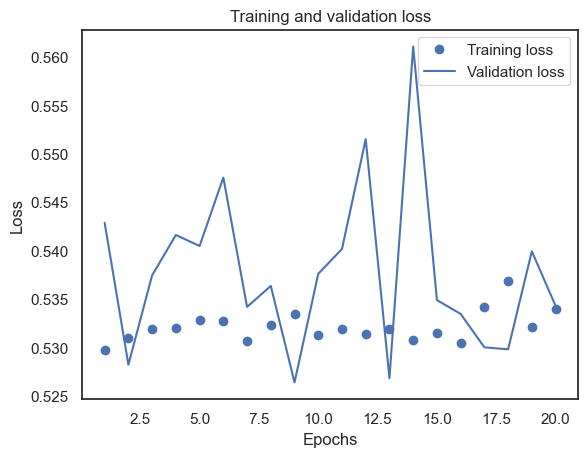

In [48]:
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values= history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

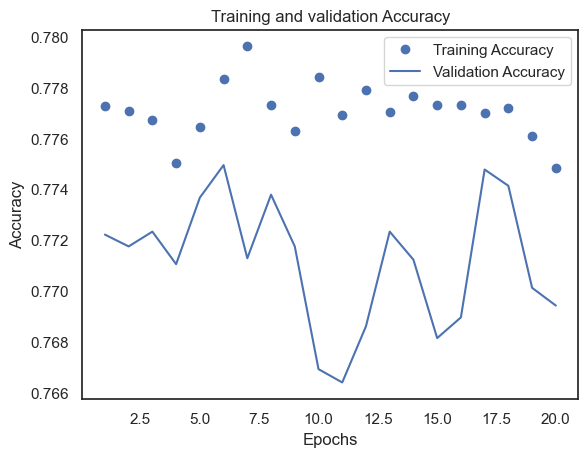

In [49]:
acc_values = history_dict["accuracy"]
val_acc_values= history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()